### MESSAGE introduction
Credit: This tutorial was developed by Oreane Edelenbosch (currently at the PBL Netherlands Environmental Assessment Agency) while she was a postdoctoral researcher at Politecnico di Milano.


#### Optimization problems

The core of MESSAGE, meaning its key relations and structure, is written in GAMS. This is a computer language that can easily solve optimization problems. In a optimization problem the optimal solution to an question should be found, such as what is the shortest distance from A to B. In energy system models often the model looks for a solution with the least energy system costs, under certain constraints. 

#### MESSAGE database
The core of the MESSAGE model connects the energy flows from the resources to the energy use. For the conversion from one level to another level, technologies are needed. Technologies in MESSAGE are associated with a certain costs and efficiency. While this structure of MESSAGE is fixed and cannot be changed, the model only gets meaning if data is added. By adding data to the MESSAGE database the energy system is actually designed. This gives the model also the flexibility to represent many different energy systems. The database can be filled through specific equations that are written in python in jupyter notebooks. Therefore this document starts with some explanation of basic python, and then of the basic equations to add data to the MESSAGE model.



### Basic python

Like in any program language python makes use of strings and list which are important for any computation. A string is a sequence of characters, and a list is number of items in an ordered or unordered structure. In the code below the s has been assigned the string coal_ppl (coal power plant). The command "print" shows what "s" contains. You can excecute the following cell through the run command in jupyter notebook.

In [3]:
s = 'coal_ppl'

In [4]:
print(s)

coal_ppl


Now we show an example of a list. t can for example be a list of technologies. Again "print" shows the content of "t".

In [5]:
t = ['coal_ppl', 'gas_ppl', 'bio_ppl']

In [6]:
print(t)

['coal_ppl', 'gas_ppl', 'bio_ppl']


After defining a list, you can refer to each element of the list, as follows:

In [7]:
t[0]

'coal_ppl'

or its length:

In [8]:
len(t)

3

A list can also be a set of numbers, with which you can make calculations:

In [9]:
efficiency = [0.6, 0.5, 0.4]

In [10]:
efficiency[0]+0.1

0.7

A sequence of numbers can be defined through the function range as well, which has the following syntax: range (start, stop, step)

In [13]:
time =range(2010, 2050, 10)
time[3]

2040

### Basic MESSAGE: filling the database

Now we will start with loading data to the MESSAGE database, and as such create our own MESSAGE model. Once you have loaded the required packages and you have defined the model and scenario name it is time to load the database. Following the MESSAGE structure, the levels, technologies and commodities/energy flows need to all be filled in before you have a working structure. Lets start with a very simple model.

In [14]:
# load required packages 
import itertools
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import ixmp as ix
import message_ix

from message_ix.utils import make_df

In [15]:
# launch the IX modeling platform using the local default database                                                                                                                       
#mp = ix.Platform(dbtype='HSQLDB')
mp = ix.Platform()

In [16]:
model = "Simple model"
scen = "baseline"
annot = "testing the basic MESSAGE structure" 

scenario = message_ix.Scenario(mp, model, scen, version='new', annotation=annot)

First the framework of the model should be defined which includes its spatial scale, time horizon as well as the levels of the energy system considered. In this simple model we consider: 
<ul>
<li>one country
<li> the time horizon 2020 to 2030    
<li>only electricty demand
<li>three powerplant types. 
</ul>    
If you type scenario. [+TAB] you will see which commands allow you to add data to the scenario. The key commands that we will use are: 
<ul>
<li>scenario.add_horizon >> to define the time horizon</li>
<li>scenario.add_spatial_sets >> to define the spatial boudaries
<li>scenario.add_set >> to define sets of technologies and commodities
<li>scenario.add_par >> to define key parameters
</ul>
What exactly the set and parameter definitions are can be found on: 

https://docs.messageix.org/en/stable/model/MESSAGE/sets_maps_def.html 


under mathematical specification. Here it is also specified which elements should be defined to correctly add these parameters and sets to the database. For example add horizon has as element 'year',see below. Similary, add_spatail_sets has as element 'country'. This defines the name of your region.

In [17]:
scenario.add_horizon({'year': [2020,2030]})

In [18]:
scenario.add_spatial_sets({'country': 'Nijmegen'})

In this case the only commodity is electricty, and we are looking at the secondary and final energy levels. The mode is something that in this simple model we are not working with but should be set to standard.

In [19]:
scenario.add_set("commodity", ["electricity"])
scenario.add_set("level", ["secondary", "final"])
scenario.add_set("mode", "standard")

The model starts with the demand that will have to be fulfilled. Therefore here we first will define the total electricity demand for the two year in our model. The demand parameter has several elements that need to be added, to be sure that all the connections in the model are set correctly. It is in this case also important to add the unit. To know which elements have to be added in order to define the demand, we can ask the database how the demand parameter looks like:

In [20]:
scenario.par("demand")

,node,commodity,level,year,time,value,unit


now the parameter can be filled with data:

In [21]:
scenario.add_par("demand", pd.DataFrame({
        'node': 'Nijmegen',
        'commodity': 'electricity',
        'level': 'final',
        'year': [2020,2030],
        'time': 'year',
        'value': [500, 600],
        'unit': 'GWa',
    }))

To check whether the data has been read in correctly you can again ask the database how the demand variable looks like, in the exact same way as before. However now you should see the data filled in.

In [22]:
scenario.par("demand")

,node,commodity,level,year,time,value,unit
0,Nijmegen,electricity,final,2020,year,500.0,GWa
1,Nijmegen,electricity,final,2030,year,600.0,GWa


Now that the model structure is set, we need to define the technologies that can convert the energy from secondary to final. In this case from either coal or gas to electricity. To define technologies, several parameters should be added to the database:

#### Engineering Parameters

- `input`
- `output`
- `technical_lifetime`
- `capacity_factor`


#### Technoeconomic Parameters

- `inv_cost`
- `fix_cost`
- `var_cost`

### Technologies

In [23]:
scenario.add_set("technology", ["coal_ppl", "gas_ppl"])

#### Technoeconomic Parameters

In [24]:
    scenario.add_par('inv_cost', pd.DataFrame({
    'node_loc': "Nijmegen",
    'year_vtg': [2020, 2030, 2020, 2030],
    'unit': 'USD/GWa',
    'technology': ["coal_ppl", "coal_ppl","gas_ppl","gas_ppl"],
    'value': [1500*1e6,1500*1e6,870*1e6,870*1e6]
}))

In [25]:
scenario.par("inv_cost")

,node_loc,technology,year_vtg,value,unit
0,Nijmegen,coal_ppl,2020,1.500000e+09,USD/GWa
1,Nijmegen,coal_ppl,2030,1.500000e+09,USD/GWa
2,Nijmegen,gas_ppl,2020,8.700000e+08,USD/GWa
3,Nijmegen,gas_ppl,2030,8.700000e+08,USD/GWa


In [26]:
    scenario.add_par('fix_cost', pd.DataFrame({
    'node_loc': "Nijmegen",
    'year_vtg': [2020, 2020, 2030,2020, 2020, 2030],
    'year_act': [2020, 2030, 2030,2020, 2020, 2030],
    'unit': 'USD/GWa',
    'technology': ["coal_ppl", "coal_ppl","coal_ppl","gas_ppl","gas_ppl","gas_ppl"],
    'value': [40,40,40,25,25,25]
}))

In [27]:
    scenario.add_par('var_cost', pd.DataFrame({
    'node_loc': "Nijmegen",
    'year_vtg': [2020, 2020, 2030,2020, 2020, 2030],
    'year_act': [2020, 2030, 2030,2020, 2020, 2030],
    'mode':'standard',
    'unit': 'USD/GWa',
    'time':'year',
    'technology': ["coal_ppl", "coal_ppl","coal_ppl","gas_ppl","gas_ppl","gas_ppl"],
    'value': [22.4,22.4,22.4,42.4,42.4,42.4]
}))

In [36]:
scenario.par('inv_cost')


,node_loc,technology,year_vtg,year_act,value,unit
0,Nijmegen,coal_ppl,2020,2020,40.0,USD/GWa
1,Nijmegen,coal_ppl,2020,2030,40.0,USD/GWa
2,Nijmegen,coal_ppl,2030,2030,40.0,USD/GWa
3,Nijmegen,gas_ppl,2020,2020,25.0,USD/GWa
4,Nijmegen,gas_ppl,2030,2030,25.0,USD/GWa


In [37]:
scenario.par('fix_cost')

,node_loc,technology,year_vtg,year_act,value,unit
0,Nijmegen,coal_ppl,2020,2020,40.0,USD/GWa
1,Nijmegen,coal_ppl,2020,2030,40.0,USD/GWa
2,Nijmegen,coal_ppl,2030,2030,40.0,USD/GWa
3,Nijmegen,gas_ppl,2020,2020,25.0,USD/GWa
4,Nijmegen,gas_ppl,2030,2030,25.0,USD/GWa


In [38]:
scenario.par('var_cost')

,node_loc,technology,year_vtg,year_act,mode,time,value,unit
0,Nijmegen,coal_ppl,2020,2020,standard,year,22.4,USD/GWa
1,Nijmegen,coal_ppl,2020,2030,standard,year,22.4,USD/GWa
2,Nijmegen,coal_ppl,2030,2030,standard,year,22.4,USD/GWa
3,Nijmegen,gas_ppl,2020,2020,standard,year,42.4,USD/GWa
4,Nijmegen,gas_ppl,2030,2030,standard,year,42.4,USD/GWa


#### Engineering parameters: efficiency
Efficiency in MESSAGE is defined by input and output at each level. This model covers the secondary to final level. Therefore is only the output of the power plants.

In [39]:
base_output = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_vtg': [2020, 2020, 2030,2020, 2020, 2030],
    'year_act': [2020, 2030, 2030,2020, 2020, 2030],
    'mode': 'standard',
    'node_origin': "Nijmegen",
    'commodity': 'electricity',
    'time': 'year',
    'time_origin': 'year',
    'technology':["coal_ppl", "coal_ppl", "coal_ppl", "gas_ppl","gas_ppl","gas_ppl"],
    'level' :'final',
    'value' : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'node_dest': "Nijmegen",
    'time_dest':'year',
    'unit' : '%'}))
scenario.add_par("output", base_output)

#### Engineering parameters: Capacity factor and lifetime

In [40]:
base_capacity_factor = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_vtg': [2020, 2020, 2030,2020, 2020, 2030],
    'year_act': [2020, 2030, 2030,2020, 2020, 2030],
    'time': 'year',
    'unit': '%',
    'technology' :["coal_ppl", "coal_ppl", "coal_ppl", "gas_ppl","gas_ppl","gas_ppl"],
    'value': [0.85, 0.85, 0.85, 0.75, 0.75, 0.75],
}))
scenario.add_par('capacity_factor', base_capacity_factor)

In [41]:
base_technical_lifetime = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_vtg': [2020,2030,2020,2030],
    'unit': 'y',
    'technology' : ["coal_ppl", "coal_ppl","gas_ppl","gas_ppl"],
    'value': [40, 40, 30, 30],
})) 

scenario.add_par('technical_lifetime', base_technical_lifetime)

### Base year activity and capacity
Finally we need to give the model a starting point. How much activity and capacity was available in 2020 should be defined. Moreover, growth contraints are added set the maximum technology growth.

In [42]:
base_activity = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_act': [2020,2020],
    'mode': 'standard',
    'time': 'year',
    'unit': 'GWa',
    'technology': ['coal_ppl', 'gas_ppl'],
    'value': [700, 500]
}))

scenario.add_par('bound_activity_up', base_activity)
scenario.add_par('bound_activity_lo', base_activity)

In [43]:
base_growth = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_act': [2020,2020],
    'value': [0.05,0.05],
    'time': 'year',
    'unit': '%',
    'technology': ['coal_ppl', 'gas_ppl']}))
    

scenario.add_par('growth_activity_up', base_growth)

In [44]:
base_capacity = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_vtg': [2020,2020],
    'unit': 'GWa',
    'technology': ['coal_ppl','gas_ppl'],
    'value': [700/0.85, 500/0.75]
}))


scenario.add_par('bound_new_capacity_up', base_capacity)

In [45]:
base_initial = pd.DataFrame(dict({
    'node_loc': "Nijmegen",
    'year_act': [2020,2020],
    'time': 'year',
    'unit': '%',
    'technology':['coal_ppl','gas_ppl'],
    'value': [700,500]
}))

scenario.add_par('initial_activity_up', base_initial)

The data collection is now finished. Next step is to send the data to the model and run.

In [46]:
comment = 'initial commit for simple model'
scenario.commit(comment)
scenario.set_as_default()

In [47]:
scenario.solve()

### Now we want to visualise the results

This tutorial contains come predefined equations to visualise the model outcomes for capacity and activity.

In [48]:
from __future__ import division
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from tools import Plots
#import Plots
#import tools

In [50]:
p = Plots(scenario, "Nijmegen")

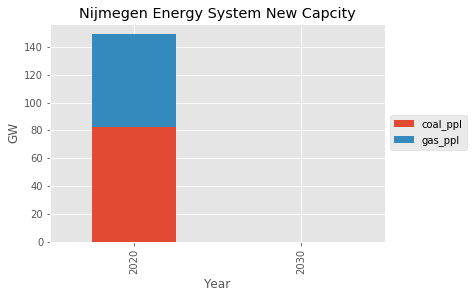

In [51]:
p.plot_new_capacity(baseyear=True)

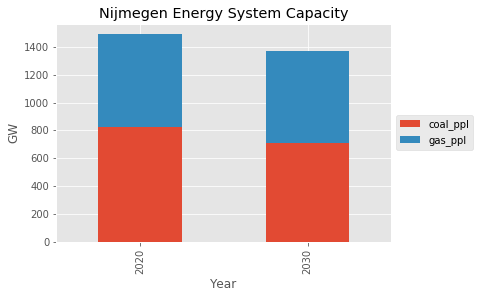

In [52]:
p.plot_capacity(baseyear=True)

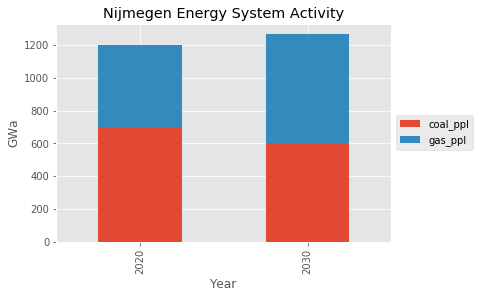

In [53]:
p.plot_activity(baseyear=True)

but the actual data can also be visualised through the tables, in a simalar way as was done for the inputs (see below). To see which variables can all be shown use first the following command.

In [54]:
scenario.var_list()

['OBJ',
 'EXT',
 'STOCK',
 'CAP_NEW',
 'CAP',
 'ACT',
 'EMISS',
 'LAND',
 'REL',
 'DEMAND',
 'PRICE_COMMODITY',
 'PRICE_EMISSION',
 'COST_NODAL',
 'COST_NODAL_NET',
 'GDP',
 'I',
 'C']

In [55]:
scenario.var('CAP_NEW')

,node_loc,technology,year_vtg,lvl,mrg
0,Nijmegen,coal_ppl,2020,82.352941,0.0
1,Nijmegen,coal_ppl,2030,0.000000,0.0
2,Nijmegen,gas_ppl,2020,66.666667,0.0
3,Nijmegen,gas_ppl,2030,0.000000,0.0


In [56]:
scenario.var('ACT')

,node_loc,technology,year_vtg,year_act,mode,time,lvl,mrg
0,Nijmegen,coal_ppl,2020,2020,standard,year,700.000000,0.000000e+00
1,Nijmegen,coal_ppl,2020,2030,standard,year,600.000000,0.000000e+00
2,Nijmegen,coal_ppl,2030,2030,standard,year,0.000000,4.411765e+08
3,Nijmegen,gas_ppl,2020,2020,standard,year,500.000000,0.000000e+00
4,Nijmegen,gas_ppl,2020,2030,standard,year,666.666667,0.000000e+00
5,Nijmegen,gas_ppl,2030,2030,standard,year,0.000000,3.866667e+08


Finally, at the end of every session it very important to close the connection to the database. Otherwise it will keep on running in the background, and you will not be able to rerun the model.

In [57]:
mp.close_db()